## Агент рекомендаций на основе онтологий

В этом примере мы попробуем извлечь знания из готовой RDF+OWL онтологии, доставшейся нам в наследство от Semantic Web. В дальнейшем на основе этого можно будет построить агента, который сможет подбирать вино к еде и наоборот на основе формализованных знаний.

Для начала, установим необходимые библиотеки:

In [ ]:
%pip install -q rdflib git+https://github.com/RDFLib/OWL-RL.git@933abdbc9a13cb49230d238d3b148334b0c0b2b0

Загрузим файлы онтологий в виде RDF-графа. Далее, к этому графу можно будет делать запросы на языке SPARQL, или просматривать тройки объект-атрибут-значение.

In [3]:
from rdflib import Graph, URIRef
from rdflib.namespace import DC, DCTERMS, DOAP, FOAF, SKOS, OWL, RDF, RDFS, VOID, XMLNS, XSD

G = Graph().parse("../source/wine.rdf").parse("../source/food.rdf")

W = URIRef("http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine")
F = URIRef("http://www.w3.org/TR/2003/PR-owl-guide-20031209/food")

for s, p, o in G:
    if o == F+"#Pasta":
        print(s, p, o)

http://www.w3.org/TR/2003/PR-owl-guide-20031209/food#PastaWithWhiteSauce http://www.w3.org/2000/01/rdf-schema#subClassOf http://www.w3.org/TR/2003/PR-owl-guide-20031209/food#Pasta
http://www.w3.org/TR/2003/PR-owl-guide-20031209/food#OtherTomatoBasedFood http://www.w3.org/2002/07/owl#disjointWith http://www.w3.org/TR/2003/PR-owl-guide-20031209/food#Pasta
http://www.w3.org/TR/2003/PR-owl-guide-20031209/food#PastaWithRedSauce http://www.w3.org/2000/01/rdf-schema#subClassOf http://www.w3.org/TR/2003/PR-owl-guide-20031209/food#Pasta


Посмотрим, какие тройки есть, связаные с винами:

In [4]:
for s, p, o in G:
    if s == W+"#Wine":
        print(s, p, o)

for s, p, o in G:
    if str(s) == "Nef58788d7c7647cdb4f60a29be853bf6":
        print(s, p, o)

http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#Wine http://www.w3.org/2000/01/rdf-schema#subClassOf N480166da479c4e59ae5e7a0faec3e70f
http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#Wine http://www.w3.org/2000/01/rdf-schema#subClassOf N4b351cbc6f274d5e93c4dcaaa227bae7
http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#Wine http://www.w3.org/1999/02/22-rdf-syntax-ns#type http://www.w3.org/2002/07/owl#Class
http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#Wine http://www.w3.org/2000/01/rdf-schema#subClassOf N13b5baf63f004acd873da464733031c2
http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#Wine http://www.w3.org/2000/01/rdf-schema#subClassOf Nd577a044dfd643d68e1c45d4912ab3c0
http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#Wine http://www.w3.org/2000/01/rdf-schema#subClassOf N14dd025f70d040e5a7b2b6a579359ec4
http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#Wine http://www.w3.org/2000/01/rdf-schema#label vin
http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#

Загрузим все сущности и переименуем их для ясности прочтения, добавив пробелы в имена:

In [5]:
import re

entities = {}
for s, p, o in G:
    if s.startswith(W) and len(s)>len(W) and s[len(W)+1].isupper():
        entities[s] = s[len(W)+1:]
    if s.startswith(F) and len(s)>len(F) and s[len(F)+1].isupper():
        entities[s] = s[len(F)+1:]
    if o.startswith(W) and len(o)>len(W) and o[len(W)+1].isupper():
        entities[o] = o[len(W)+1:]
    if o.startswith(F) and len(o)>len(F) and o[len(F)+1].isupper():
        entities[o] = o[len(F)+1:]

def namify(x):
    return re.sub(r'([a-z])([A-Z])', r'\1 \2', x)
    
ents = { x : namify(x) for x in set(entities.values()) }

entities = { k : ents[v] for k, v in entities.items() }

entities

{rdflib.term.URIRef('http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#FormanCabernetSauvignon'): 'Forman Cabernet Sauvignon',
 rdflib.term.URIRef('http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#NapaRegion'): 'Napa Region',
 rdflib.term.URIRef('http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#MariettaPetiteSyrah'): 'Marietta Petite Syrah',
 rdflib.term.URIRef('http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#Moderate'): 'Moderate',
 rdflib.term.URIRef('http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#Rose'): 'Rose',
 rdflib.term.URIRef('http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#Chianti'): 'Chianti',
 rdflib.term.URIRef('http://www.w3.org/TR/2003/PR-owl-guide-20031209/food#PastaWithSpicyRedSauce'): 'Pasta With Spicy Red Sauce',
 rdflib.term.URIRef('http://www.w3.org/TR/2003/PR-owl-guide-20031209/food#PastaWithRedSauce'): 'Pasta With Red Sauce',
 rdflib.term.URIRef('http://www.w3.org/TR/2003/PR-owl-guide-20031209/wine#Port'): 'Port',
 rdflib.term.URIRef('h

Также в тройках есть явное отношение наследования `subClassOf`, которое мы можем выделить:

In [6]:
relations = []
ents = set()
for s, p, o in G:
    if p == RDFS.subClassOf:
        if s in entities and o in entities:
            ents.add(entities[s])
            ents.add(entities[o])
            relations.append({
                "source" : entities[s], 
                "rel" : "subclass",
                "target" : entities[o]
            })
        
relations

[{'source': 'Pasta With Spicy Red Sauce',
  'rel': 'subclass',
  'target': 'Pasta With Red Sauce'},
 {'source': 'Port', 'rel': 'subclass', 'target': 'Red Wine'},
 {'source': 'Pasta With Light Cream Sauce',
  'rel': 'subclass',
  'target': 'Pasta With White Sauce'},
 {'source': 'Non Spicy Red Meat', 'rel': 'subclass', 'target': 'Red Meat'},
 {'source': 'Dessert Wine', 'rel': 'subclass', 'target': 'Wine'},
 {'source': 'Red Meat', 'rel': 'subclass', 'target': 'Meat'},
 {'source': 'Grape', 'rel': 'subclass', 'target': 'Sweet Fruit'},
 {'source': 'Meal', 'rel': 'subclass', 'target': 'Consumable Thing'},
 {'source': 'Edible Thing', 'rel': 'subclass', 'target': 'Consumable Thing'},
 {'source': 'Early Harvest', 'rel': 'subclass', 'target': 'Wine'},
 {'source': 'Wine Grape', 'rel': 'subclass', 'target': 'Grape'},
 {'source': 'Non Sweet Fruit', 'rel': 'subclass', 'target': 'Edible Thing'},
 {'source': 'Sauternes', 'rel': 'subclass', 'target': 'Late Harvest'},
 {'source': 'Shellfish', 'rel': 'sub

Построим это в виде графа:

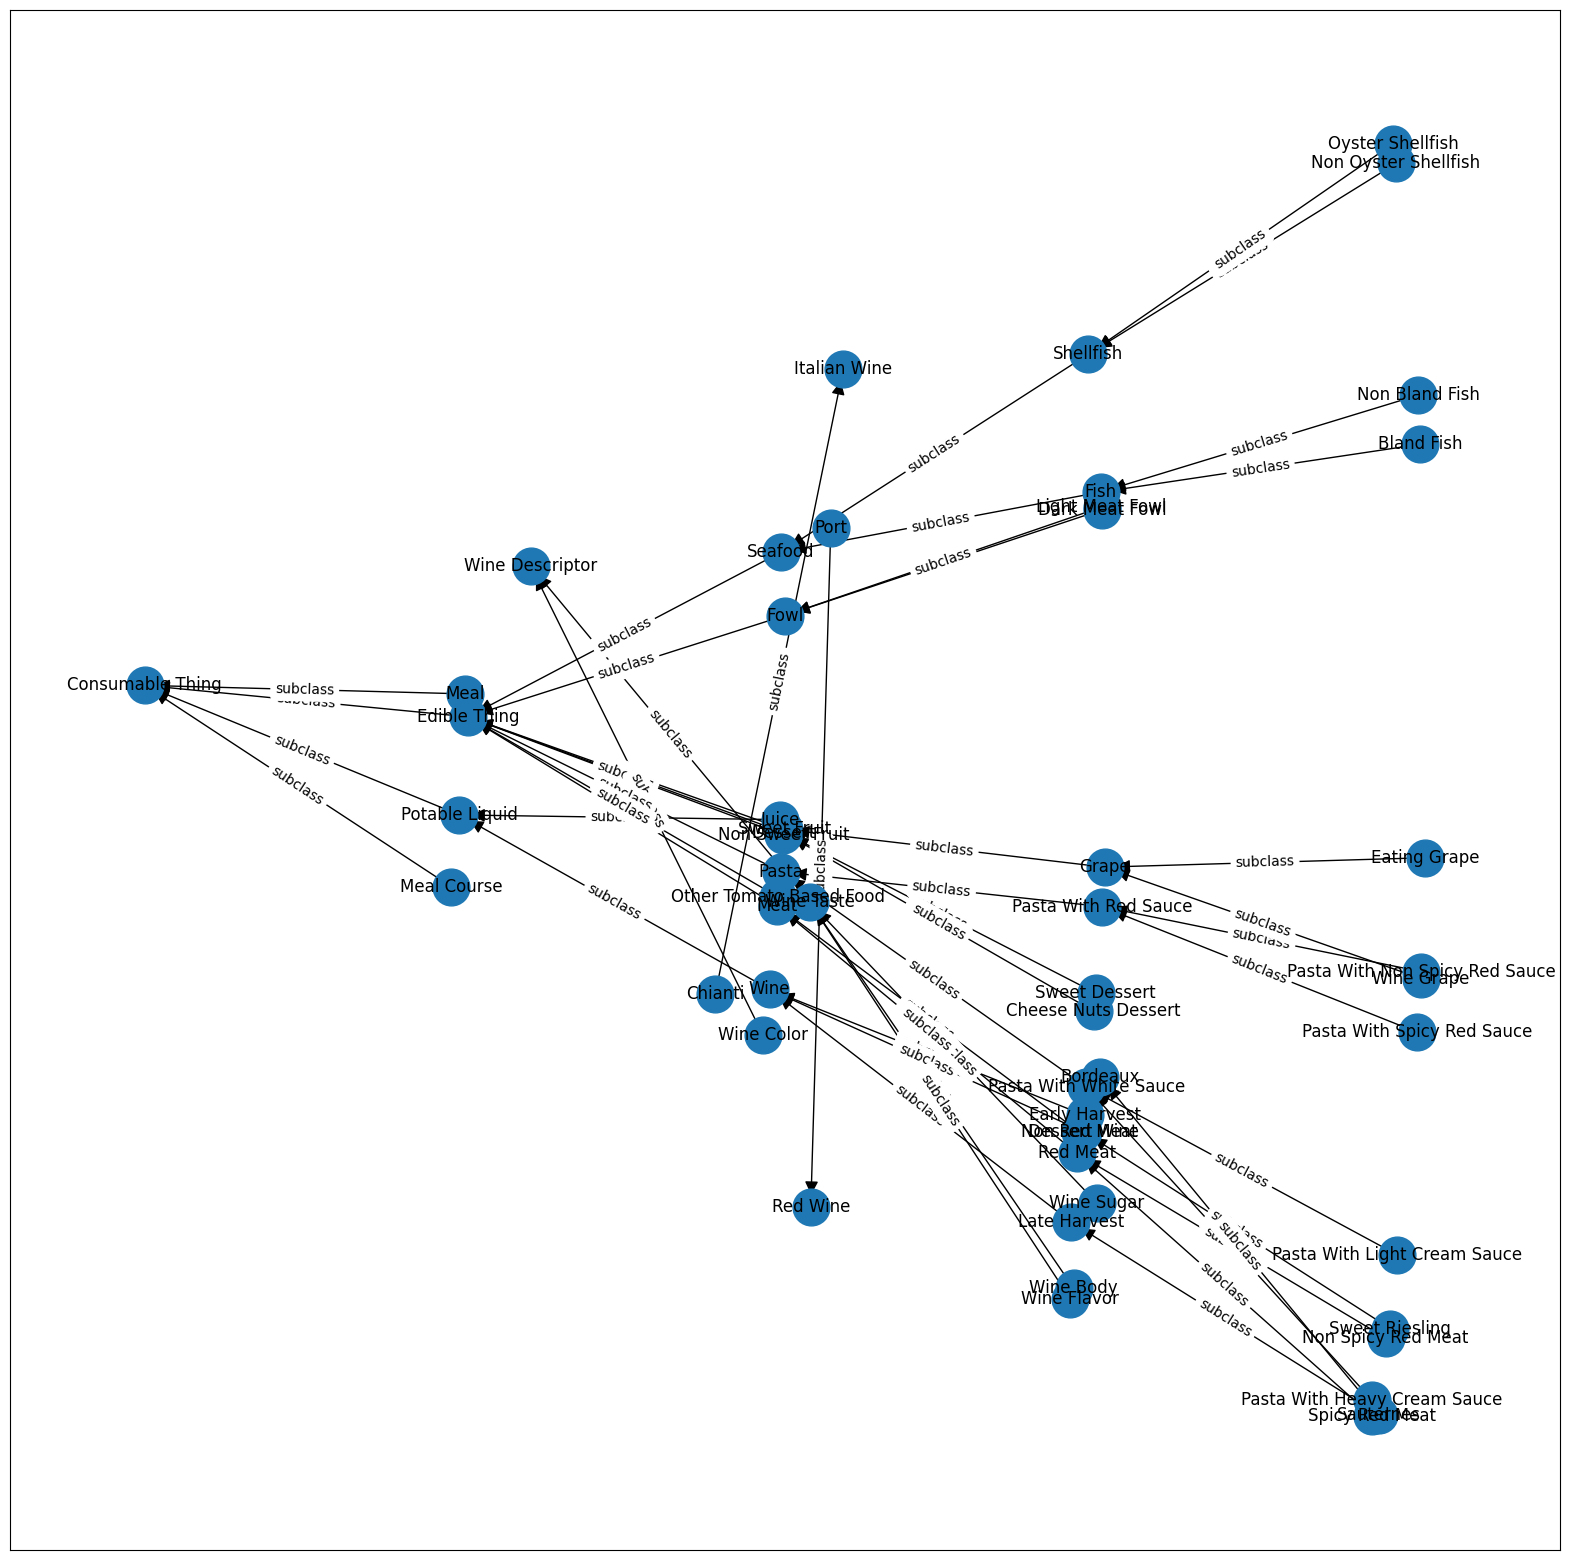

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
GX = nx.DiGraph()

for e in ents:
    GX.add_node(e, label=e)

for r in relations:
    GX.add_edge(r['source'], r['target'], label=r['rel'])

def plot_graph(G):
    plt.figure(figsize=(20,20))

    # Define node positions using a layout
    pos = nx.kamada_kawai_layout(G)

    # Draw the nodes with labels
    nx.draw_networkx_nodes(G, pos, node_size=700)
    nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=12)

    # Draw the edges with labels
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrowstyle='-|>', arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'label'))

    # Display the graph
    plt.show()

plot_graph(GX)

Для выделения части дерева в виде списка, реализуем следующую функцию: 

In [9]:
def gen_tree(x):
    sub = [ gen_tree(r['source']) for r in relations if r['target']==x]
    if len(sub)==0:
        return x
    else:
        return { x : sub }
    
gen_tree("Consumable Thing")
        

{'Consumable Thing': ['Meal',
  {'Edible Thing': ['Non Sweet Fruit',
    'Other Tomato Based Food',
    {'Pasta': [{'Pasta With White Sauce': ['Pasta With Light Cream Sauce',
        'Pasta With Heavy Cream Sauce']},
      {'Pasta With Red Sauce': ['Pasta With Spicy Red Sauce',
        'Pasta With Non Spicy Red Sauce']}]},
    {'Meat': [{'Red Meat': ['Non Spicy Red Meat', 'Spicy Red Meat']},
      'Non Red Meat']},
    {'Seafood': [{'Shellfish': ['Non Oyster Shellfish', 'Oyster Shellfish']},
      {'Fish': ['Non Bland Fish', 'Bland Fish']}]},
    {'Fowl': ['Light Meat Fowl', 'Dark Meat Fowl']},
    {'Dessert': ['Cheese Nuts Dessert', 'Sweet Dessert']},
    {'Sweet Fruit': [{'Grape': ['Wine Grape', 'Eating Grape']}]}]},
  {'Potable Liquid': ['Juice',
    {'Wine': [{'Dessert Wine': ['Sweet Riesling']},
      'Early Harvest',
      {'Late Harvest': ['Sauternes']}]}]},
  'Meal Course']}

In [83]:
def explore(x):
    anc = [ r['source'] for r in relations if r['target']==x]
    desc = [r['target'] for r in relations if r['source']==x]
    return anc, desc

explore("Wine")


(['Dessert Wine', 'Early Harvest', 'Late Harvest'], ['Potable Liquid'])

Очевидно, что не все нужные нам отношения присутствуют в этом дереве. Поэтому необходимо научиться использовать возможности логического вывода OWL+RDF для получение полной картины. 

In [86]:
from owlrl import CombinedClosure, DeductiveClosure, OWLRL_Extension
#DeductiveClosure(OWLRL_Extension).expand(G)
print(len(G))
CombinedClosure.RDFS_OWLRL_Semantics(G,None,None).closure()
print(len(G))

2709
21659


In [77]:
from rdflib import Graph, RDF, RDFS, OWL, Namespace

def extract_wine_info(graph):
    wine_info_list = []

    for wine in graph.subjects(RDF.type, OWL.Class):
        wine_name = wine.split('#')[-1]


        wine_info = {"wine": wine_name}

        # Extract properties
        properties = {
            "hasColor": None,
            "hasFlavor": None,
            "hasSugar": None,
            "hasBody": None,
            "madeFromGrape": []
        }

        # Extract properties directly from the class
        for restriction in graph.objects(wine, RDFS.subClassOf):
            if (restriction, RDF.type, OWL.Restriction) in graph:
                on_property = graph.value(restriction, OWL.onProperty)
                if on_property:
                    property_name = on_property.split('#')[-1]
                    if property_name in properties:
                        has_value = graph.value(restriction, OWL.hasValue)
                        if has_value:
                            properties[property_name] = has_value.split('#')[-1]

        # Extract properties from intersectionOf restrictions
        for collection in graph.objects(wine, OWL.intersectionOf):
            for member in collection:
                if (member, RDF.type, OWL.Restriction) in graph:
                    on_property = graph.value(member, OWL.onProperty)
                    if on_property:
                        property_name = on_property.split('#')[-1]
                        if property_name in properties:
                            all_values_from = graph.value(member, OWL.allValuesFrom)
                            if all_values_from:
                                for grape in graph.objects(all_values_from, OWL.oneOf):
                                    for grape_item in grape:
                                        properties["madeFromGrape"].append(grape_item.split('#')[-1])
                            min_cardinality = graph.value(member, OWL.minCardinality)
                            if min_cardinality:
                                properties["minCardinality"] = int(min_cardinality)

        # Filter out properties that are None or empty
        for key, value in properties.items():
            if value or (isinstance(value, list) and value):
                wine_info[key] = value

        wine_info_list.append(wine_info)

    return wine_info_list

extract_wine_info(G)

[{'wine': 'Wine'},
 {'wine': 'Vintage'},
 {'wine': 'WineGrape'},
 {'wine': 'WhiteWine'},
 {'wine': 'WhiteTableWine'},
 {'wine': 'TableWine'},
 {'wine': 'WhiteNonSweetWine'},
 {'wine': 'N7e535b6b524644ec9b435280ad1ad00e'},
 {'wine': 'WhiteLoire'},
 {'wine': 'Loire'},
 {'wine': 'N2eaa9a2a0b8d4f8b9319a41a0ef86375'},
 {'wine': 'WhiteBurgundy', 'madeFromGrape': 'ChardonnayGrape'},
 {'wine': 'Burgundy', 'hasSugar': 'Dry'},
 {'wine': 'WhiteBordeaux'},
 {'wine': 'Bordeaux'},
 {'wine': 'N6c2ec7be2e0d41b8b9532dc99db3b62f'},
 {'wine': 'Region'},
 {'wine': 'VintageYear'},
 {'wine': 'Zinfandel', 'hasColor': 'Red', 'hasSugar': 'Dry'},
 {'wine': 'Nc8e5123450b841faba4653685ed5eef4'},
 {'wine': 'N50ad34246fa940eab9bbffb785a3f070'},
 {'wine': 'Winery'},
 {'wine': 'WineDescriptor'},
 {'wine': 'WineTaste'},
 {'wine': 'WineColor'},
 {'wine': 'WineSugar'},
 {'wine': 'WineFlavor'},
 {'wine': 'WineBody'},
 {'wine': 'Tours', 'madeFromGrape': 'CheninBlancGrape'},
 {'wine': 'SweetWine'},
 {'wine': 'SweetRiesling